## ***Nubar Pu-239: multigroup covariance matrix and perturbation coefficient***

# ***Multigroup covariance matrix***



import useful models

In [2]:
import sandy 
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:\\cygwin64\\bin'

Get the ENDF-6 file  and the errorr file

In [3]:
zam = sandy.zam.nuclide2zam("Pu239")
tape = sandy.get_endf6_file("jeff_33", "xs", zam)
errorr = tape.get_errorr()
type(errorr)

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


dict

Extract the multigroup covariance matrix for the nubar prompt (the only one present)


In [134]:
cov_matrix = errorr["errorr31"].get_cov().data[(9437,456)]

Plot of the covariance matrix as heatmap


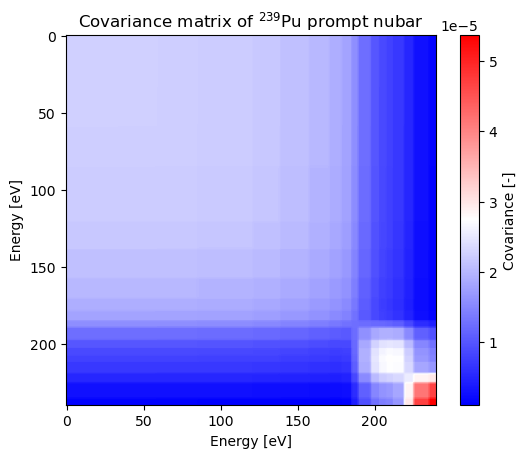

In [5]:
fig1, ax1 = plt.subplots()

im1 = ax1.imshow(cov_matrix, cmap = "bwr")
ax1.set_xlabel("Energy [eV]")
ax1.set_ylabel("Energy [eV]")
ax1.set_title("Covariance matrix of $^{239}$Pu prompt nubar") 
plt.colorbar(im1, ax = ax1, label = "Covariance [-]")
plt.show()


# ***Perturbation coefficients***


In [129]:
smp = 20
perturb_coeff = tape.get_perturbations(nsmp = smp)[31].data.loc[(9437,456)]



INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


Plot of the perturbation coefficients

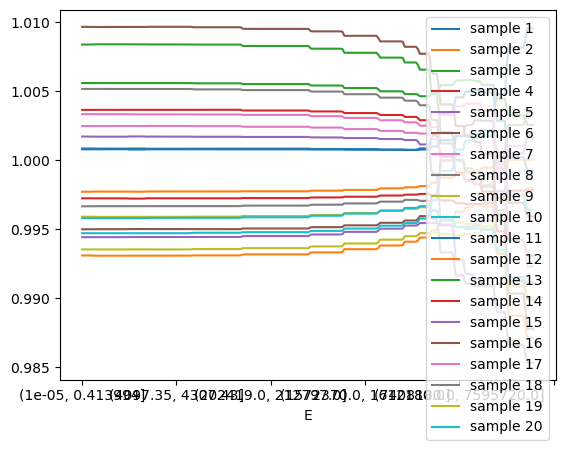

In [130]:
for sample in perturb_coeff.columns:
    perturb_coeff[sample].plot(label = "sample " + str(sample + 1))
plt.legend(posi)
    
    